## CNN_Single_Digit Classification

**Imports**

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


**Dataset**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

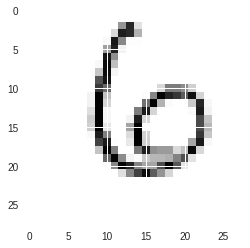

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
a = X_test[100]
plt.imshow(a)

In [0]:
y_test_5= (y_test==0)
y_train_5 = (y_train==0)

In [0]:
print(y_test_5[10])
print(y_test_5[100])

True
False


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28, 1).astype('float32')

In [0]:
print(len(X_train))
print(len(y_train_5))
print(len(X_test))
print(len(y_test_5))

60000
60000
10000
10000


In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


**Pre-Processing**

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train_5 = np_utils.to_categorical(y_train_5)
y_test_5 = np_utils.to_categorical(y_test_5)
num_classes =2

In [0]:
from keras import models
from keras import layers

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dens

In [0]:
from google.colab import drive
drive.mount('/content/cnn')

Drive already mounted at /content/cnn; to attempt to forcibly remount, call drive.mount("/content/cnn", force_remount=True).


In [0]:
#import os
#os.listdir('/content/cnn/My Drive/CNN_Tutorial/Models and CSV')

**Keras Callbacks**
1.   Model CheckPoint
2.   CSV Logger
3.   TensorBoard

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Single_Digit_Original_LeNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Single_Digit_Original_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [0]:
history=model.fit(X_train,y_train_5, validation_data=(X_test, y_test_5), epochs=10, batch_size=200, verbose=2,callbacks=[cv,mc,tb])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.0587 - acc: 0.9823 - val_loss: 0.0126 - val_acc: 0.9964
Epoch 2/10
 - 3s - loss: 0.0123 - acc: 0.9963 - val_loss: 0.0119 - val_acc: 0.9959
Epoch 3/10
 - 3s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0066 - val_acc: 0.9979
Epoch 4/10
 - 3s - loss: 0.0068 - acc: 0.9978 - val_loss: 0.0059 - val_acc: 0.9982
Epoch 5/10
 - 3s - loss: 0.0055 - acc: 0.9983 - val_loss: 0.0083 - val_acc: 0.9970
Epoch 6/10
 - 3s - loss: 0.0051 - acc: 0.9983 - val_loss: 0.0048 - val_acc: 0.9984
Epoch 7/10
 - 3s - loss: 0.0042 - acc: 0.9985 - val_loss: 0.0053 - val_acc: 0.9982
Epoch 8/10
 - 3s - loss: 0.0034 - acc: 0.9988 - val_loss: 0.0046 - val_acc: 0.9984
Epoch 9/10
 - 3s - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0046 - val_acc: 0.9985
Epoch 10/10
 - 3s - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0054 - val_acc: 0.9981


In [0]:
scores = model.evaluate(X_test, y_test_5, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.005385347082337103
Test accuracy: 0.9981


**Saving and loading models**

In [0]:
#from keras.models import load_model
#model2 = model.save('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/single_mnist.h5')
#model2 = load_model("/content/cnn/My Drive/CNN_Tutorial/Models and CSV/single_mnist.csv")

#### Prediction on Test data

[[1.3600182e-05 9.9998641e-01]]
1


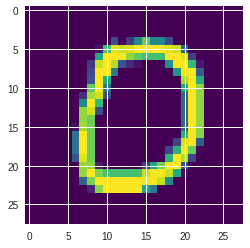

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 10  #10  #101
plt.imshow(X_test[image_index].reshape(28, 28),cmap='viridis')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred)
print(pred.argmax())
#102

1 Actual is  7 Predicted is0
2 Actual is  2 Predicted is0
3 Actual is  1 Predicted is0
4 Actual is  0 Predicted is1
5 Actual is  4 Predicted is0
6 Actual is  1 Predicted is0
7 Actual is  4 Predicted is0
8 Actual is  9 Predicted is0
9 Actual is  5 Predicted is0
10 Actual is  9 Predicted is0
11 Actual is  0 Predicted is1
12 Actual is  6 Predicted is0
13 Actual is  9 Predicted is0
14 Actual is  0 Predicted is1
15 Actual is  1 Predicted is0
16 Actual is  5 Predicted is0
17 Actual is  9 Predicted is0
18 Actual is  7 Predicted is0
19 Actual is  3 Predicted is0
20 Actual is  4 Predicted is0
21 Actual is  9 Predicted is0
22 Actual is  6 Predicted is0
23 Actual is  6 Predicted is0
24 Actual is  5 Predicted is0
25 Actual is  4 Predicted is0
26 Actual is  0 Predicted is1
27 Actual is  7 Predicted is0
28 Actual is  4 Predicted is0
29 Actual is  0 Predicted is1
30 Actual is  1 Predicted is0
31 Actual is  3 Predicted is0
32 Actual is  1 Predicted is0
33 Actual is  3 Predicted is0
34 Actual is  4 Pre

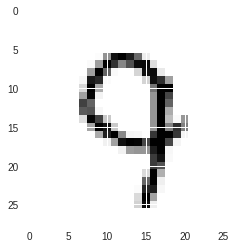

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
  plt.imshow(X_test[i].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[i].reshape(1, 28, 28, 1))
  print(""+str(i+1)+" Actual is "+ " " + str(y_test[i])+" Predicted is"+str(pred.argmax()))

**Loading Your Own Data**

In [0]:
#import cv2
#import numpy as np
#img1 = cv2.imread('/content/cnn/My Drive/CNN_Tutorial/Test_Images/0.jpeg')
#plt.imshow(img1)
#img1 = np.resize(img1,(28,28,1))
#img1 = img1/255
#img1 = np.expand_dims(img1, axis=0)
#print(img1.shape)
#plt.imshow(img1)

In [0]:
#print((model.predict(img1)))
#print(model.predict_classes(img1))

#### TensorBoard Visualization

In [0]:
#tensorboard --logdir=/home/student/Documents/ActiveNeuron/Keras/ALL_CSV_MODEL/logs
#tensorboard --logdir=/tmp  --port=8008

**Confusion Matrix**

In [0]:
'''from sklearn.metrics import classification_report,confusion_matrix
import itertools
import numpy as np
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0','class 1']
print(classification_report(np.argmax(y_test_5), y_pred,target_names=target_names))
'''

"from sklearn.metrics import classification_report,confusion_matrix\nimport itertools\nimport numpy as np\nY_pred = model.predict(X_test)\ny_pred = np.argmax(Y_pred, axis=1)\ntarget_names = ['class 0','class 1']\nprint(classification_report(np.argmax(y_test_5), y_pred,target_names=target_names))\n"

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(y_test_5,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

**Layers of LeNet**

In [0]:
for layer in model.layers:
  print(layer)

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 84)
(1, 2)


**1st Activation (Convolution_1)**

(1, 24, 24, 6)


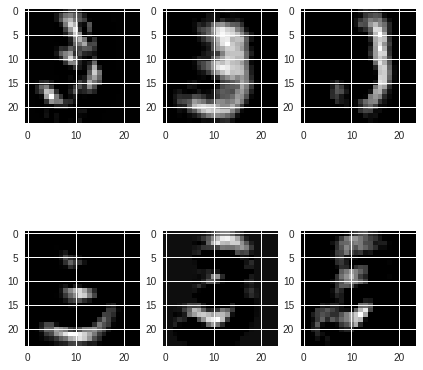

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

**2nd Activation (MaxPooling_1)**

(1, 12, 12, 6)


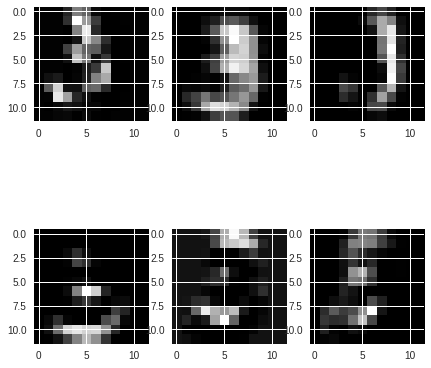

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

**3rd Activation (Convolution_2)**

(1, 8, 8, 16)


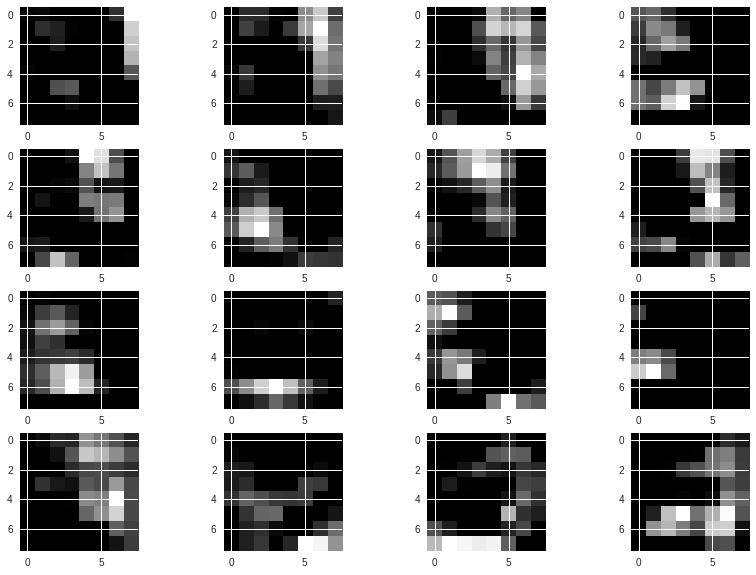

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

**2nd Activation (MaxPooling_2)**

(1, 4, 4, 16)


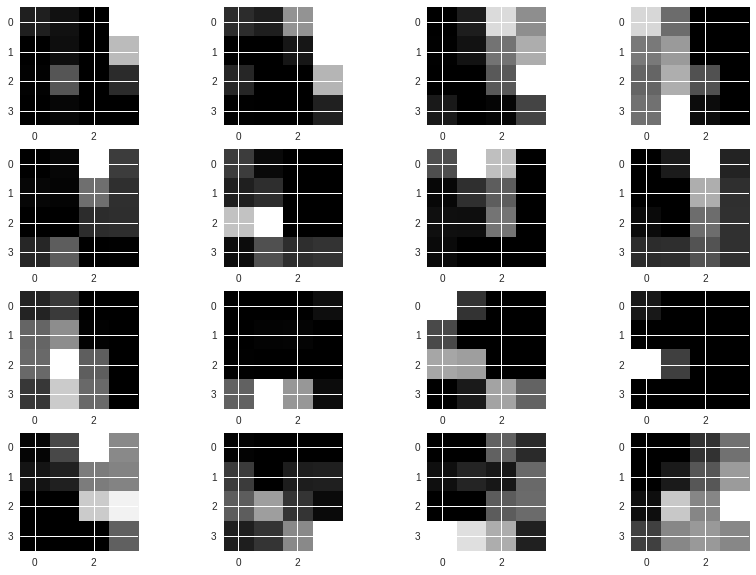

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

**Classification Layer**

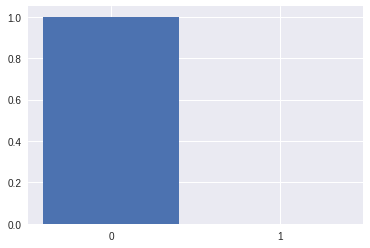

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

**Filter Visualization**

**Output Filters of First CNN block**

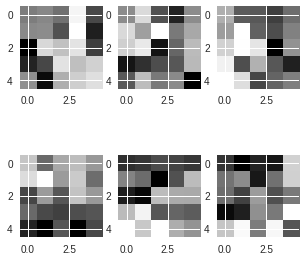

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.02927103 -0.01109619 -0.04813785  0.1786341  -0.12020521]
 [-0.00824494 -0.00320431 -0.10510682  0.19708806 -0.19254622]
 [-0.24639294  0.12936322  0.08824141  0.14790323 -0.1387503 ]
 [-0.18457465 -0.12276746  0.14635508  0.0854196   0.11579121]
 [ 0.00198132 -0.22885877  0.05842216  0.11151514  0.14030823]]

[[ 0.0599751   0.16861442 -0.0209371  -0.08639362  0.05979991]
 [ 0.1670927   0.0866491   0.22095935  0.03573888  0.09934618]
 [ 0.15354234  0.19022427 -0.1071538   0.00817246  0.12566556]
 [-0.10539003 -0.0673554  -0.02647571 -0.01357339  0.12274943]
 [-0.01011243  0.128634    0.03500471  0.05701049 -0.13484244]]

[[ 0.06327008 -0.08230586 -0.08796001 -0.12966968 -0.04927227]
 [ 0.03151125  0.2013646  -0.07258144 -0.10600867 -0.0159543 ]
 [ 0.12095644  0.19842651  0.15554571 -0.23987378  0.01277939]
 [ 0.177183   -0.10403926  0.06554861 -0.08990494 -0.18178867]
 [ 0.20035677  0.14361602 -0.11910598 -0.06617945 -0.02027682]]

[[ 0.1380177  -0.04898955  0.08006828  0.12190207

**Output Filters of Second CNN block**

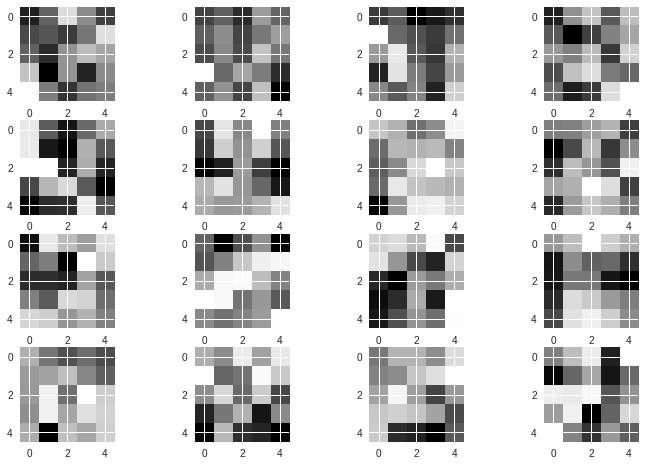

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-0.11013763 -0.016678    0.15151684  0.0386406  -0.06584721]
 [-0.05193326 -0.03624555 -0.07283406  0.00942435  0.15516506]
 [-0.01900181 -0.09379393  0.0512243   0.10683558  0.074733  ]
 [ 0.11964868 -0.15528817  0.04799578 -0.10688128  0.0386607 ]
 [ 0.2009658   0.01959057 -0.08152077  0.00540115  0.0211026 ]]

[[-0.08601485 -0.04395927 -0.11976279  0.03344165 -0.04144164]
 [-0.04733809  0.01428894 -0.08485182 -0.013845    0.03730041]
 [-0.07379808  0.00779481 -0.07537418  0.08624958 -0.01515929]
 [ 0.17003715 -0.03482474  0.04769659 -0.00898839 -0.11654707]
 [-0.04407287  0.02150594 -0.08337595  0.08401671 -0.17853579]]

[[ 0.01632232  0.04450957 -0.03587462 -0.01415675  0.0067399 ]
 [ 0.18856661  0.05600882  0.03470818  0.01641009  0.06387427]
 [ 0.09942511  0.16907954  0.04224317  0.01300247  0.11994287]
 [-0.00585325  0.16455092  0.07298879  0.02533655  0.10001643]
 [ 0.08348099  0.04220051  0.08065829 -0.00552082  0.1460631 ]]

[[-0.11386819  0.00914979  0.06636734 -0.0489458 